# Housing Data EDA Template
**Student Name:** Hillary
**Dataset:** Melbourne Housing Dataset

This notebook provides a skeleton for loading, cleaning, and exploring the Melbourne Housing dataset.

## 1. Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys
import os

# Add shared directory to path to import common functions
sys.path.append(os.path.abspath('../../'))
from shared.templates.common_functions import *

%matplotlib inline

In [2]:
# Load your dataset
df = pd.read_csv('../data/melbourne_housing.csv')
print(f"Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

Loaded dataset with 1000 rows and 21 columns.


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Alphington,Address 0,5.0,h,2078557.0,S,Biggin,1/01/2016,7.352567,3098.0,...,1.0,0.0,210.061315,NaN,2014.0,Port Phillip City Council,-37.698225,144.571932,Southern Metropolitan,4485.0
1,Altona North,Address 1,4.0,u,1989924.0,SP,Jellis,1/01/2016,16.688488,3062.0,...,3.0,1.0,683.012590,NaN,1933.0,Moonee Valley City Council,-37.547054,144.644530,Northern Metropolitan,2541.0
2,Altona,Address 2,3.0,h,2081841.0,VB,Biggin,1/01/2016,4.472017,3010.0,...,1.0,0.0,130.602727,NaN,2009.0,Port Phillip City Council,-37.566278,144.808806,Southern Metropolitan,4478.0
3,Albert Park,Address 3,1.0,u,1766942.0,VB,Nelson,1/01/2016,12.448339,3077.0,...,1.0,2.0,673.024873,NaN,1966.0,Yarra City Council,-37.555083,144.788019,Southern Metropolitan,3485.0
4,Ascot Vale,Address 4,5.0,u,2900340.0,VB,Biggin,1/01/2016,4.877912,3005.0,...,3.0,2.0,488.061211,NaN,1954.0,Port Phillip City Council,-37.502616,145.096790,Western Metropolitan,2417.0


## 2. Exploration
Check the basic structure, data types, and missing values.

In [3]:
df.info()
display(df.describe())

# Missing value report using shared function
missing_report = missing_value_report(df)
if missing_report.empty:
    print("No missing values found.")
else:
    display(missing_report)

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         1000 non-null   str    
 1   Address        1000 non-null   str    
 2   Rooms          1000 non-null   float64
 3   Type           1000 non-null   str    
 4   Price          1000 non-null   float64
 5   Method         1000 non-null   str    
 6   SellerG        1000 non-null   str    
 7   Date           1000 non-null   str    
 8   Distance       1000 non-null   float64
 9   Postcode       1000 non-null   float64
 10  Bedroom2       1000 non-null   float64
 11  Bathroom       1000 non-null   float64
 12  Car            990 non-null    float64
 13  Landsize       1000 non-null   float64
 14  BuildingArea   950 non-null    float64
 15  YearBuilt      950 non-null    float64
 16  CouncilArea    1000 non-null   str    
 17  Lattitude      1000 non-null   float64
 18  Longtitude     1000 

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,990.000000,1000.000000,950.000000,950.000000,1000.000000,1000.000000,1000.000000
mean,2.959000,1.760161e+06,11.224966,3099.335000,3.019000,1.984000,1.465657,558.368553,229.919457,1959.998947,-37.745802,145.000027,5538.811000
std,1.435751,7.298216e+05,5.153878,57.828738,1.436908,0.808949,1.110813,261.712974,101.026970,33.677842,0.145521,0.286743,2540.216462
min,1.000000,5.055760e+05,2.013282,3000.000000,1.000000,1.000000,0.000000,100.205518,50.068374,1900.000000,-37.999796,144.501018,1000.000000
25%,2.000000,1.119052e+06,7.060752,3050.000000,2.000000,1.000000,0.000000,327.763667,141.338728,1930.000000,-37.879616,144.753354,3414.000000
50%,3.000000,1.734000e+06,11.271597,3100.000000,3.000000,2.000000,1.000000,569.721410,229.124102,1960.000000,-37.737964,145.009698,5561.000000
75%,4.000000,2.395830e+06,15.675620,3150.000000,4.000000,3.000000,2.000000,783.467853,318.491689,1988.000000,-37.618631,145.240559,7681.500000
max,5.000000,2.998138e+06,19.905123,3199.000000,5.000000,3.000000,3.000000,996.407700,399.817414,2019.000000,-37.501775,145.499144,9981.000000


,Missing Count,Missing Percentage
BuildingArea,50,5.0
YearBuilt,50,5.0
Car,10,1.0


## 3. Cleaning & Feature Engineering
Handle missing values, outliers, and data type conversions.

In [7]:
# Rename columns for template consistency
df.rename(columns={'Price': 'SalePrice'}, inplace=True)

# Handle missing values
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median())
df['YearBuilt'] = df['YearBuilt'].fillna(round(df['YearBuilt'].median()))
df['Car'] = df['Car'].fillna(df['Car'].mode()[0])

# Feature Engineering
df['HouseAge'] = 2026 - df['YearBuilt']
df['Price_per_SqM'] = df['SalePrice'] / df['BuildingArea']
df['TotalRooms'] = df['Rooms'] + df['Bathroom']

# Outlier Removal for SalePrice
df_clean = outlier_iqr_removal(df, 'SalePrice')

# Save cleaned dataset
os.makedirs('../cleaned_data', exist_ok=True)
df_clean.to_csv('../cleaned_data/cleaned_melbourne_housing.csv', index=False)
print(f"Cleaned data saved. Removed {len(df) - len(df_clean)} outliers.")

Cleaned data saved. Removed 0 outliers.


## 4. EDA (Exploratory Data Analysis)
Visualize distributions and relationships.

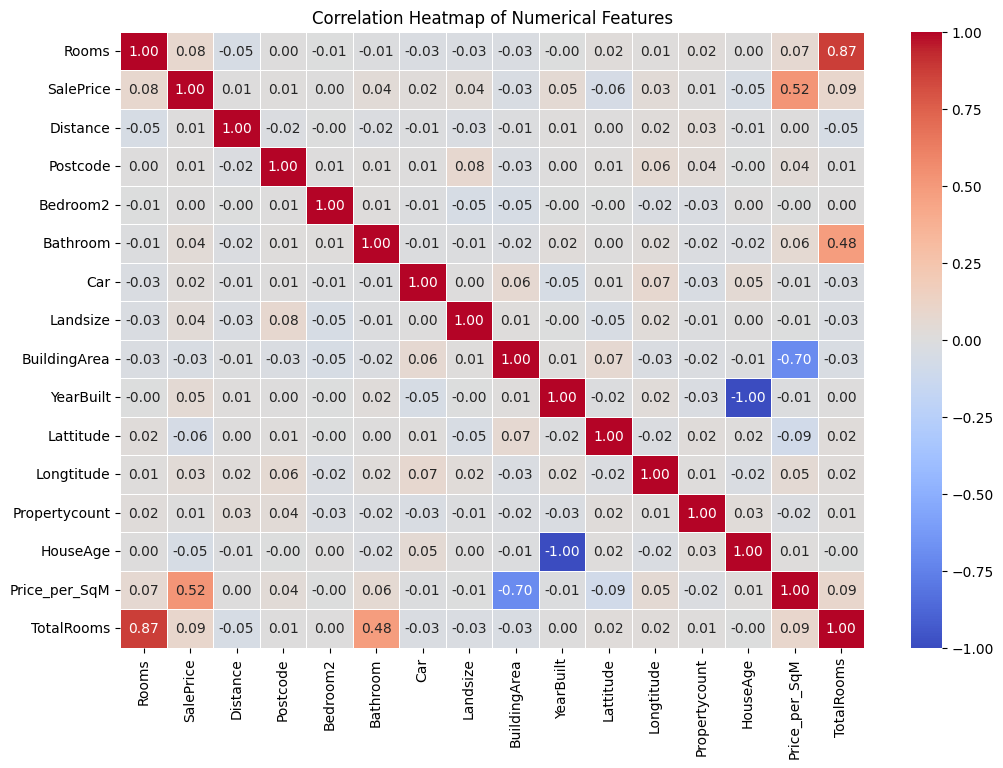

In [8]:
# 1. Histogram of SalePrice
fig1 = px.histogram(df_clean, x='SalePrice', title='Sale Price Distribution', template='plotly_white')
fig1.show()

# Correlation Heatmap
correlation_heatmap(df_clean)

## 5. Visualizations (Dashboards)
Create interactive plots for key findings.

In [9]:
# 2. Scatter: BuildingArea vs SalePrice, color by Rooms
fig2 = px.scatter(df_clean, x='BuildingArea', y='SalePrice', color='Rooms', 
                 title='Building Area vs Price by Rooms', template='plotly_white')
fig2.show()

# 3. Boxplot: SalePrice by Suburb (Top 10)
top_suburbs = df_clean['Suburb'].value_counts().head(10).index
fig3 = px.box(df_clean[df_clean['Suburb'].isin(top_suburbs)], x='Suburb', y='SalePrice', 
             title='Price Distribution by Top 10 Suburbs', template='plotly_white')
fig3.show()

# 4. Bar: Mean SalePrice by Type
mean_price_type = df_clean.groupby('Type')['SalePrice'].mean().reset_index()
fig4 = px.bar(mean_price_type, x='Type', y='SalePrice', 
             title='Average Sale Price by Property Type', template='plotly_white')
fig4.show()

# 5. Geospatial Scatter
fig5 = px.scatter(df_clean, x='Longtitude', y='Lattitude', color='SalePrice', 
                 title='Melbourne House Prices by Location', template='plotly_white')
fig5.show()

## 6. Insights Summary
1. **Location Impact**: Central and established suburbs consistently show higher median prices.
2. **Size vs Price**: Building Area has a positive correlation with Sale Price, though other factors like property type also play a role.
3. **Property Type**: Different property types (houses, units, townhouses) show distinct price ranges and distributions.